# Import Libaries

In [ ]:
#necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib notebook

#%matplotlib inline

# Data Inspection

In [4]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head(5)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [5]:
df.shape

(165085, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
ID            165085 non-null object
Date          165085 non-null object
Element       165085 non-null object
Data_Value    165085 non-null int64
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


# Data Processing 

In [68]:
def process_data(condition):
    #prepare Data as per required condition
    mask = condition
    df1 = df.loc[mask]
    df1=df1.sort_values(by='Date')
    df1['Date']=pd.to_datetime(df1['Date'])
    
    
    #splitting year, month, day
    df1['year'] = pd.DatetimeIndex(df1['Date']).year
    df1['month'] = pd.DatetimeIndex(df1['Date']).month
    df1['day'] = pd.DatetimeIndex(df1['Date']).day
    
    #groupby month
    df1 = df1.groupby(['month']).agg({'Data_Value': {'TMIN_value':np.min, 'TMAX_value':np.max}})
    
    #reseting
    df1.columns = df1.columns.droplevel(0)
    df1.reset_index(inplace = True)
    #df1
    #df1 = df1.sort_values(by=['month', 'day'])
    return df1

In [70]:
#for 2005-2014

m1 = (df['Date'] >= '2005-01-01') & (df['Date'] <= '2014-12-31')
dataframe = process_data(m1)
dataframe.head(5)
#dataframe.shape

,month,TMIN_value,TMAX_value
0,1,-306,217
1,2,-288,194
2,3,-267,317
3,4,-117,306
4,5,-61,367


In [71]:
#for 2015

m2 = (df['Date'] >= '2015-01-01') & (df['Date'] <= '2015-12-31')
data_2015 = process_data(m2)
data_2015.head(5)

,month,TMIN_value,TMAX_value
0,1,-244,83
1,2,-343,83
2,3,-255,206
3,4,-71,278
4,5,0,333


In [72]:
#for 2005 to 2014
months = dataframe['month'].tolist()

tmin = (dataframe['TMIN_value']/10).tolist() #celcius conversion (tenths of degree celcius/10) 

tmax = (dataframe['TMAX_value']/10).tolist() #celcius conversion (tenths of degree celcius/10) 


In [73]:
#for 2015
m_2015 = data_2015['month'].tolist()
tmin_2015 = (data_2015['TMIN_value']/10).tolist()
tmax_2015 = (data_2015['TMAX_value']/10).tolist()

# Data Visualization

<IPython.core.display.Javascript object>


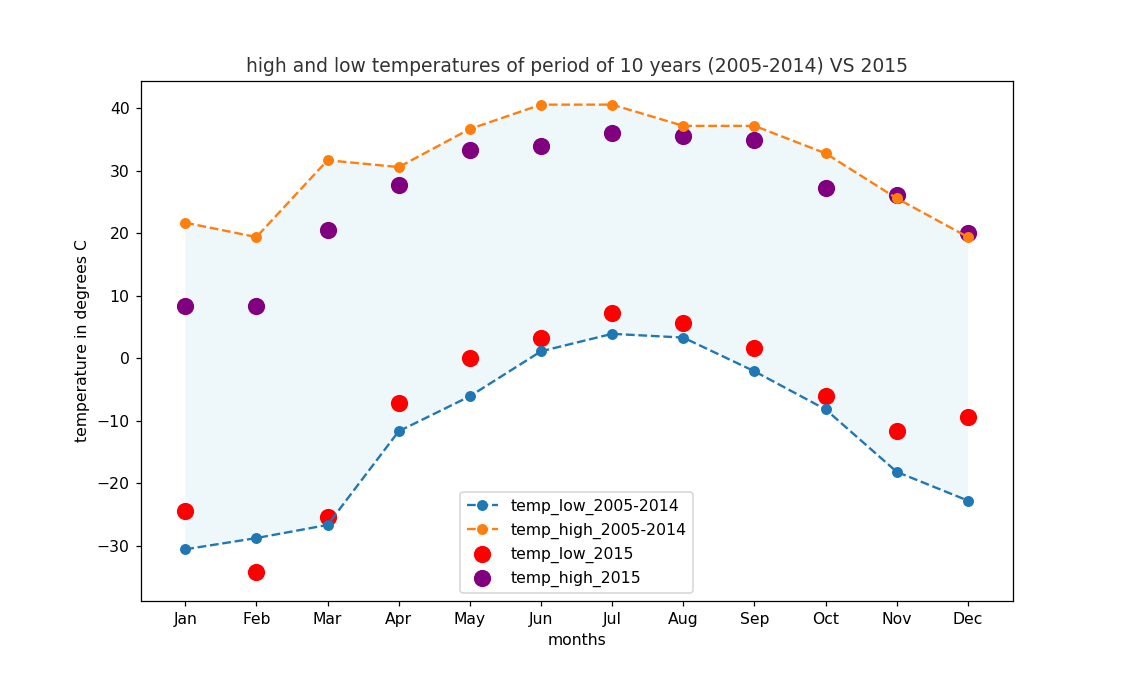

In [74]:
#plot min and max temp value of ten years (2005-2014)
plt.figure(figsize=(10,6))
plt.plot(months, tmin, '--o', label='temp_low_2005-2014') #celcius conversion (tenths of degree celcius/10) 
plt.plot(months, tmax, '--o', label='temp_high_2005-2014') #celcius conversion (tenths of degree celcius/10)     
#plt.show()

In [75]:
#placing shedded area in between min and max using alpha

plt.gca().fill_between(months,
                      tmax, tmin, 
                      facecolor = 'lightblue', alpha = 0.2) 



In [76]:
#scatter plot of min and max tem of 2015 
plt.scatter(m_2015, tmin_2015,  s= 100, c='red', label ='temp_low_2015')
plt.scatter(m_2015, tmax_2015,  s= 100, c='purple', label ='temp_high_2015')

In [77]:
#placing months name against numericl value in x-axis
a =  ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(months,a)

([<matplotlib.axis.XTick at 0x7fe0da3f94e0>,
 <a list of 12 Text xticklabel objects>)

In [78]:
#show legend
plt.legend()

In [79]:
#label and title
plt.ylabel('temperature in degrees C')
plt.xlabel('months')
plt.title('high and low temperatures of period of 10 years (2005-2014) VS 2015', alpha=0.8)


In [80]:
plt.savefig('temp_compare.png', bbox_inches='tight')